<a href="https://colab.research.google.com/github/swaroopkasaraneni/PythonProgramming/blob/main/CertificationCourse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Compute -- What are the top 10 Zipcodes for 911 & Question 1: Are Zipcodes 19446
and 19090 present ?


In [2]:
import pandas as pd



df = pd.read_csv('/content/mew2ktykm4.csv')
zip_counts = df['zip'].value_counts()
top_10_zipcodes = zip_counts.head(10)

print("Top 10 Zip Codes by Frequency:")
print(top_10_zipcodes)

if 19446 in zip_counts.index and 19090 in zip_counts.index:
    print("Yes")
else:
    print("No")



FileNotFoundError: [Errno 2] No such file or directory: '/content/mew2ktykm4.csv'

• Compute -- What are the top 4 townships (twp) for 911 calls & Question 2: Which of
the following township are not present? -- LOWER POTTSGROVE, NORRISTOWN,
HORSHAM, ABINGTON


In [22]:
twps_counts = df['twp'].value_counts()
print(twps_counts.head(4))

townships_to_check = ['LOWER POTTSGROVE', 'NORRISTOWN', 'HORSHAM', 'ABINGTON']
missing_townships = []
for twp in townships_to_check:
  if twp not in twps_counts.index:
    missing_townships.append(twp)

print("Missing townships:", missing_townships)



twp
LOWER MERION    22886
ABINGTON        16379
NORRISTOWN      15421
UPPER MERION    14015
Name: count, dtype: int64
Missing townships: []


• Compute -- Create new features & Question 3: What is the most common Reason for a
911 call based on Reason Column? Which comes second


In [33]:
df['reason'] = df['title'].apply(lambda title: title.split(':')[0])
reason_counts = df['reason'].value_counts()

# Display the most common reason (first) and the second most common reason (second)


print(f"Most common reason: {reason_counts.index[0]} -  {reason_counts.values[0]}")
print(f"Second most common reason: {reason_counts.index[1]} -  {reason_counts.values[1]}")



Most common reason: EMS -  133234
Second most common reason: Traffic -  93400


• Compute -- Plot barchart using matplot for 911 calls by Reason & Question 4: How
can you plot the bars horizontally ?


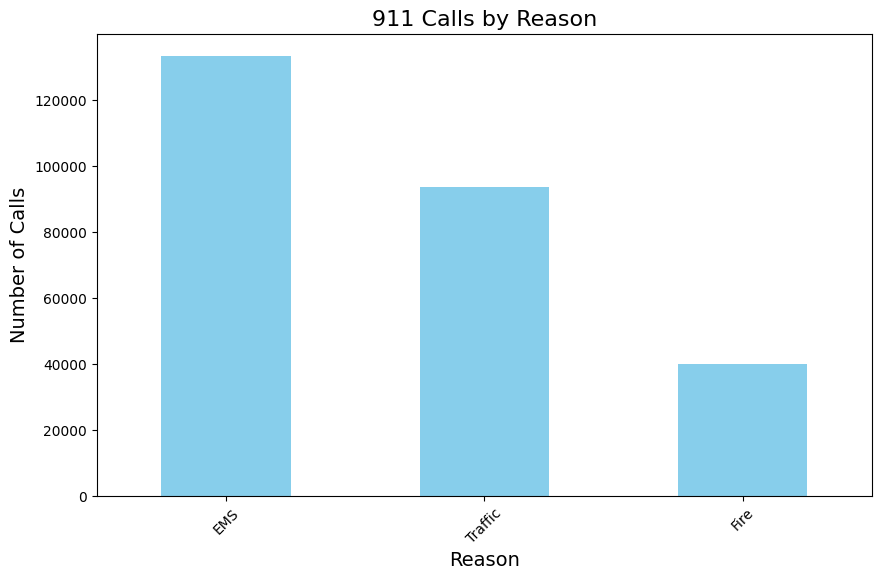

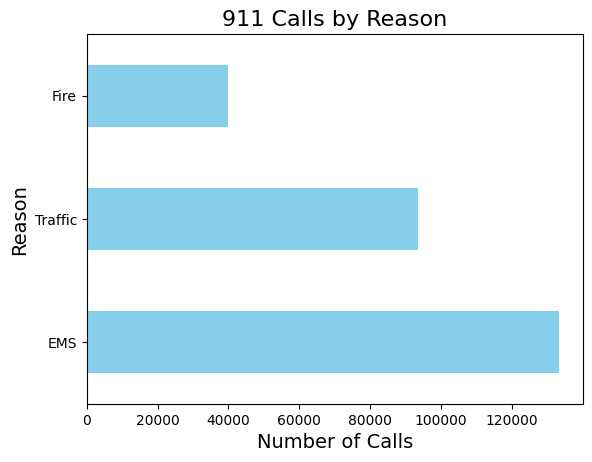

In [31]:
import matplotlib.pyplot as plt

reason_counts = df['reason'].value_counts()

plt.figure(figsize=(10,6))
reason_counts.plot(kind='bar', color='skyblue')

plt.title('911 Calls by Reason', fontsize=16)
plt.xlabel('Reason', fontsize=14)
plt.ylabel('Number of Calls', fontsize=14)
plt.xticks(rotation=45)
plt.show()

reason_counts.plot(kind='barh', color='skyblue')
plt.title('911 Calls by Reason', fontsize=16)
plt.xlabel('Number of Calls', fontsize=14)
plt.ylabel('Reason', fontsize=14)
plt.show()


•  Compute -- Do data manipulation & Question 5: Which day got maximum calls for EMS and how
many?

In [35]:

df['day_of_week'] = pd.to_datetime(df['timeStamp']).dt.day_name()

ems_calls = df[df['reason'] == 'EMS']
ems_day_counts = ems_calls['day_of_week'].value_counts()
max_day = ems_day_counts.idxmax()
max_count = ems_day_counts.max()

# Output the result
print(f"The day with the maximum EMS calls is {max_day} with {max_count} calls.")


The day with the maximum EMS calls is Friday with 19938 calls.


• Compute -- Create a countplot of the Day of Week column with the hue based of the
Reason column & Question 6: On which day traffic calls were lowest ?


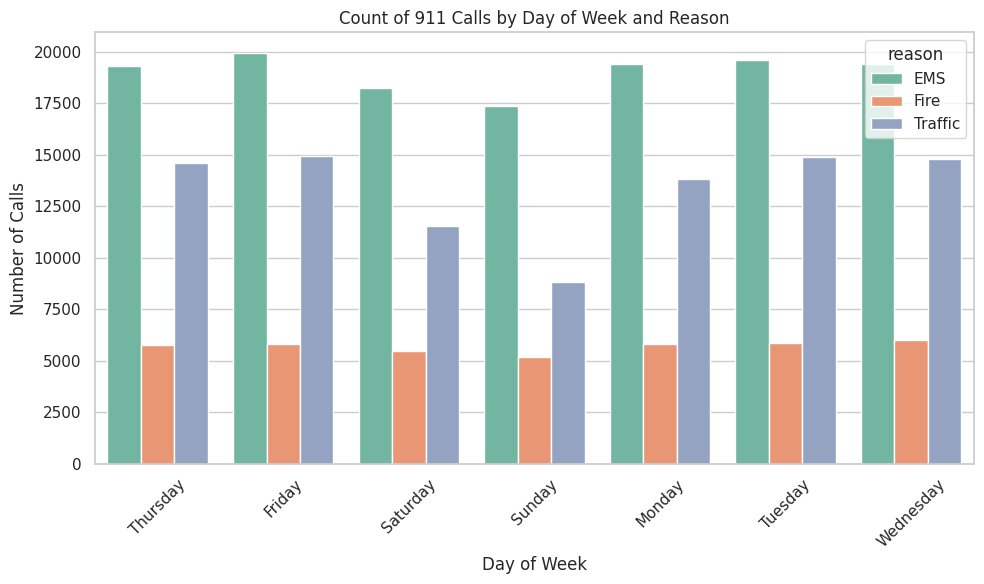

The day with the lowest traffic calls is Sunday with 8847 calls.


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_week', hue='reason', palette='Set2')

plt.title('Count of 911 Calls by Day of Week and Reason')
plt.xlabel('Day of Week')
plt.ylabel('Number of Calls')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


traffic_calls = df[df['reason'] == 'Traffic']
traffic_calls_by_day = traffic_calls['day_of_week'].value_counts()
lowest_traffic_day = traffic_calls_by_day.idxmin()
lowest_traffic_count = traffic_calls_by_day.min()

print(f"The day with the lowest traffic calls is {lowest_traffic_day} with {lowest_traffic_count} calls.")


• Compute -- Create a countplot month wise -- Question 7: Which month saw highest
calls for fire?


<ipython-input-42-da9bbdc2d7c1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Month', palette='viridis')


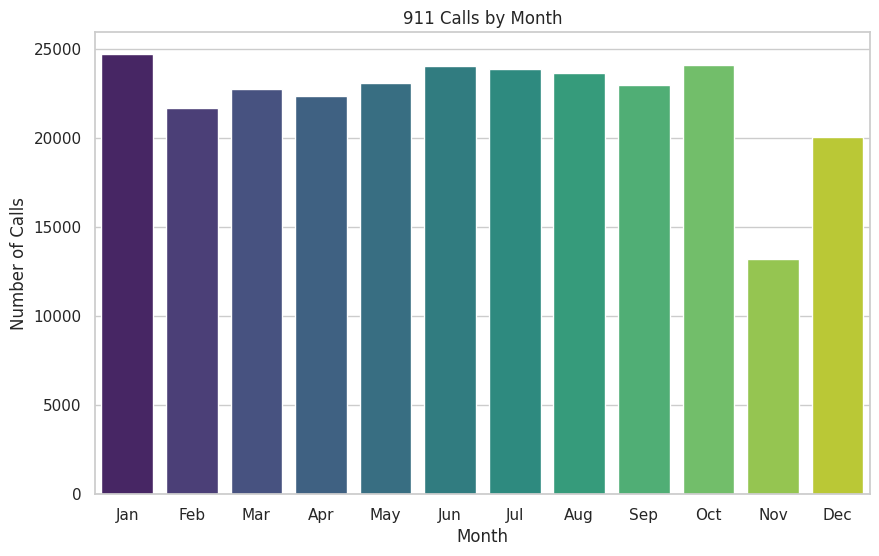

The month with the highest number of fire-related calls is Jun with 3773 calls.


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['Month'] = df['timeStamp'].dt.month

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Month', palette='viridis')

plt.title('911 Calls by Month')
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.xticks(ticks=range(12), labels=labels)
plt.show()


fire_calls = df[df['reason'] == 'Fire']
monthly_fire_calls = fire_calls['Month'].value_counts().sort_index()
max_month = monthly_fire_calls.idxmax()
max_calls = monthly_fire_calls.max()

print(f"The month with highest number of fire-related calls is {labels[max_month-1]} with {max_calls} calls.")


• Compute -- Create Web Map for Traffic Calls & Question 8: Why some areas seem to
have lower or almost zero traffic calls? Hint: Zoom the map

In [1]:
import folium
from folium.plugins import MarkerCluster


traffic_calls = df[df['reason'] == 'Traffic']
map_center = [traffic_calls['lat'].mean(), traffic_calls['lng'].mean()]
m = folium.Map(location=map_center, zoom_start=15)

marker_cluster = MarkerCluster().add_to(m)

for idx, row in traffic_calls.iterrows():
    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=f"Description: {row['desc']}<br>Time: {row['timeStamp']}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(marker_cluster)

m.save("WebMap.html")


NameError: name 'df' is not defined